# logistic regression

In [2]:
import tensorflow as tf
import numpy as np
import input_data

# Import MINST data
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
input_data.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [4]:
# tf Graph Input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [5]:
# Create model
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w):
    return tf.matmul(X, w)

# like in linear regression, we need a shared variable weight matrix
# for logistic regression
w = init_weights([784, 10]) 

In [6]:
# Construct model
# compute mean cross entropy (softmax is applied internally)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(model(x, w), y)) 
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # construct optimizer
predict_op = tf.argmax(model(x, w), 1) # at predict time, evaluate the argmax of the logistic regression

In [9]:
# Launch the graph
with tf.Session() as sess:
    tf.initialize_all_variables().run()

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(train_op, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(predict_op, tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

 Epoch: 0001 cost= 1.181141054
Epoch: 0002 cost= 0.664358092
Epoch: 0003 cost= 0.553026987
Epoch: 0004 cost= 0.499294951
Epoch: 0005 cost= 0.466518660
Epoch: 0006 cost= 0.443856266
Epoch: 0007 cost= 0.427351894
Epoch: 0008 cost= 0.414347254
Epoch: 0009 cost= 0.403219846
Epoch: 0010 cost= 0.394844531
Epoch: 0011 cost= 0.387121435
Epoch: 0012 cost= 0.380693078
Epoch: 0013 cost= 0.375634897
Epoch: 0014 cost= 0.369904718
Epoch: 0015 cost= 0.365776612
Epoch: 0016 cost= 0.361626607
Epoch: 0017 cost= 0.358361928
Epoch: 0018 cost= 0.354674878
Epoch: 0019 cost= 0.351685582
Epoch: 0020 cost= 0.349124772
Epoch: 0021 cost= 0.346287186
Epoch: 0022 cost= 0.344134942
Epoch: 0023 cost= 0.341778976
Epoch: 0024 cost= 0.340130984
Epoch: 0025 cost= 0.337454195
Optimization Finished!
Accuracy: 0.9122


# Softmax

[ 0.8360188   0.11314284  0.05083836]


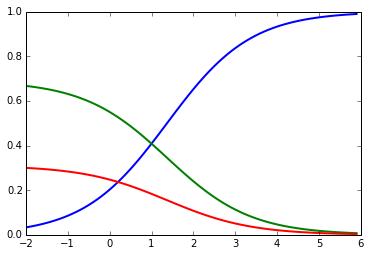

In [11]:
%matplotlib inline
"""Softmax."""

scores = np.array([3.0, 1.0, 0.2])

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x)/np.sum(np.exp(x), axis=0)

# print(softmax(scores*10)) -> classifier become very confident about its predictions
# print(softmax(scores/10)) -> classifier become very unsure
print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()